In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
%matplotlib inline
# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

      id                                             review rating
0  45881  Rand was a good guy, really... he was. But I f...  awful
1  45881  He is brilliant in his field, but expects his ...   poor
2  45881  He has a major in philosophy which is why all ...  awful


rating
awesome    26.803244
awful      20.827998
good       19.163466
poor       16.944089
average    16.261204
Name: count, dtype: float64

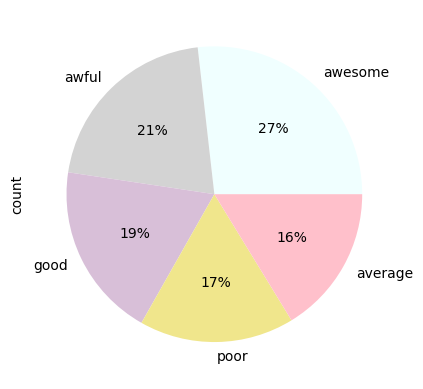

In [57]:
# faculty_reviews = pd.read_csv('/content/clgstuff/rpm.csv')
faculty_reviews = pd.read_csv("https://0x0.st/HWRY.csv")

faculty_reviews.rename(columns = {'tid':'id','comment':'review','quality':'rating'}, inplace = True)
print(faculty_reviews.head(3))

faculty_reviews.rating.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["azure", "lightgrey", "thistle","khaki","pink"])
percent_val = 100 * faculty_reviews['rating'].value_counts()/len(faculty_reviews)
percent_val


In [58]:
# faculty_reviews.drop(faculty_reviews.index[faculty_reviews.rating == "good"], inplace=True)
# faculty_reviews.drop(faculty_reviews.index[faculty_reviews.rating == "awful"], inplace=True)
# faculty_reviews.loc(faculty_reviews.index[faculty_reviews.rating == "good"], inplace=True)
faculty_reviews.loc[faculty_reviews.rating == "good", "Sentiment_rating"] = "positive"
faculty_reviews.loc[faculty_reviews.rating == "awesome", "Sentiment_rating"] = "positive"
faculty_reviews.loc[faculty_reviews.rating == "poor", "Sentiment_rating"] = "netural"
faculty_reviews.loc[faculty_reviews.rating == "awful", "Sentiment_rating"] = "negative"
faculty_reviews.loc[faculty_reviews.rating == "average", "Sentiment_rating"] = "netural"

percent_val = 100 * faculty_reviews['Sentiment_rating'].value_counts()/len(faculty_reviews)
percent_val

# faculty_reviews
# faculty_reviews.to_csv("dasdata.csv",index=False)
# file1 = open("dasdata.csv", "a")  # append mode

# file1.close()

print(len(faculty_reviews))

2343


In [59]:
faculty_reviews['review'] = faculty_reviews['review'].str.lower().str.replace('[^\w\s]', '', regex=True)

faculty_reviews

,id,review,rating,Sentiment_rating
0,45881,rand was a good guy really he was but i felt h...,awful,negative
1,45881,he is brilliant in his field but expects his s...,poor,netural
2,45881,he has a major in philosophy which is why all ...,awful,negative
3,45881,i thought his class was extremely hard but des...,good,positive
4,45881,i recently just finished taking comp 110 with ...,poor,netural
...,...,...,...,...
2338,64144,hes really disoriented but a really cool guy a...,average,netural
2339,64144,no comments,good,positive
2340,64144,horrible,average,netural
2341,64144,no comments,awful,negative


In [60]:
# nltk.download('stopwords')
# nltk.download('punkt')
# faculty_reviews['reviews_text_new'] = faculty_reviews['review'].str.lower()
# spl_chars = faculty_reviews['reviews_text_new'].apply(lambda review:
#                                                      [char for char in list(review) if not char.isalnum() and char != ' '])

# ## Getting list of list into a single list
# flat_list = [item for sublist in spl_chars for item in sublist]

# review_backup = faculty_reviews['reviews_text_new'].copy()
# faculty_reviews['reviews_text_new'] = faculty_reviews['reviews_text_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')
# stop_words = stopwords.words('english')
# def stopwords_removal(stop_words, sentence):
#     return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

# faculty_reviews['reviews_text_nonstop'] = faculty_reviews['reviews_text_new'].apply(lambda row: stopwords_removal(stop_words, row))
# faculty_reviews[['reviews_text_new','reviews_text_nonstop']]

In [65]:
# vectorizer = TfidfVectorizer (min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
vectorizer = TfidfVectorizer (min_df=2, max_df=0.8, stop_words=stopwords.words('english'))

processed_features = vectorizer.fit_transform(faculty_reviews['review'].astype(str)).toarray()

X_train, X_test, y_train, y_test = train_test_split(
                                                    processed_features,# Features
                                                    faculty_reviews['Sentiment_rating'], # Target variable,
                                                    test_size=0.2,# 20% test size
                                                    random_state=0
                                                    )



In [66]:
len(X_train)

1874

In [68]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier()
text_classifier.fit(X_train,y_train)
predictions = text_classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 40  46  18]
 [ 19  68  81]
 [  2  19 176]]
              precision    recall  f1-score   support

    negative       0.66      0.38      0.48       104
     netural       0.51      0.40      0.45       168
    positive       0.64      0.89      0.75       197

    accuracy                           0.61       469
   macro avg       0.60      0.56      0.56       469
weighted avg       0.60      0.61      0.58       469

0.605543710021322


In [69]:
review_array = np.array(["faculty is very very rude , always comming late"])
print(type(review_array))
review_vector = vectorizer.transform(review_array).toarray()
print(text_classifier.predict(review_vector))

<class 'numpy.ndarray'>
['negative']


In [72]:
import pickle
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))
pickle.dump(text_classifier, open('nlp_model.pkl', 'wb'))
filename = 'nlp_model.pkl'
clf = pickle.load(open(filename, 'rb'))
cv=pickle.load(open('tranform.pkl','rb'))

data = ["nor good not best"]
vect = cv.transform(data).toarray()
my_prediction = clf.predict(vect)
print(my_prediction)

['positive']
